## 1. Import Libraries

In [15]:
pip install feature-engine

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
    --------------------------------------- 0.3/11.3 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.3 MB 2.4 MB/s eta 0:00:05
   ---- ----------------------------------- 1.3/11.3 MB 2.2 MB/s eta 0:00:05
   ------ --------------------------------- 1.8/11.3 MB 2.4 MB/s eta 0:00:04
   -------- ------------------------------- 2.4/11.3 MB 2.4 MB/s eta 0:00:04
   ---------- ----------------------------- 2.9/11.3 MB 2.4 MB/s eta 0:00:04
   ------------ --------------------------- 3.4/11.3 MB 2.5 MB/s eta 0:00:04
   ------------- -------------------------- 3.9/11.3 MB 2.5 MB/s eta 0:00:03
   --------------- ------------------------ 4.5/11.3 MB 2.5 MB/s eta 0:00:03
   ----------------- ---------------------- 5.0/11.3 MB 2.5 MB/s eta 0:00:03
   -------------------- ------------------- 5.8/11.3 MB 2.6 MB/s eta 0:00:03
   ---------

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyfume 0.3.4 requires pandas==1.5.3, but you have pandas 2.3.2 which is incompatible.

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: C:\ProgramData\anaconda3\python.exe -m pip install --upgrade pip


In [6]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import warnings

import sklearn
from sklearn.ensemble import RandomForestRegressor

from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.compose import ColumnTransformer

from sklearn.metrics.pairwise import rbf_kernel

from sklearn.preprocessing import (
	OneHotEncoder,
	OrdinalEncoder,
	StandardScaler,
	MinMaxScaler,
	PowerTransformer,
	FunctionTransformer
)

from feature_engine.outliers import Winsorizer
from feature_engine.datetime import DatetimeFeatures
from feature_engine.selection import SelectBySingleFeaturePerformance
from feature_engine.encoding import (
	RareLabelEncoder,
	MeanEncoder,
	CountFrequencyEncoder
)

import matplotlib.pyplot as plt

import warnings

In [4]:
pip install --upgrade bottleneck

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: C:\ProgramData\anaconda3\python.exe -m pip install --upgrade pip


## 2. Display Settings

In [7]:
pd.set_option("display.max_columns", None)

In [8]:
sklearn.set_config(transform_output="pandas")

In [9]:
warnings.filterwarnings("ignore")

## 3. Read Data

In [10]:
file_path = r"C:\Users\khans\OneDrive\Desktop\AWS Project\data\train.csv"
train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,21/03/2019,Bangalore,New Delhi,BLR → BOM → DEL,08:55:00,19:10:00,615,1.0,In-flight meal not included,7832
1,Jet Airways,27/03/2019,Delhi,Cochi,DEL → BOM → COK,17:30:00,04:25:00,655,1.0,In-flight meal not included,6540
2,Goair,09/03/2019,Bangalore,New Delhi,BLR → DEL,11:40:00,14:35:00,175,0.0,No Info,7305
3,Air India,12/06/2019,Kolkata,Banglore,CCU → BOM → BLR,09:25:00,18:30:00,545,1.0,No Info,8366
4,Jet Airways,12/03/2019,Bangalore,New Delhi,BLR → BOM → DEL,22:55:00,07:40:00,525,1.0,In-flight meal not included,11087
...,...,...,...,...,...,...,...,...,...,...,...
6690,Jet Airways,21/03/2019,Delhi,Cochi,DEL → BDQ → BOM → COK,10:45:00,18:50:00,1925,2.0,No Info,11093
6691,Air India,1/05/2019,Kolkata,Banglore,CCU → BOM → BLR,09:25:00,18:30:00,545,1.0,No Info,8891
6692,Jet Airways,1/06/2019,Delhi,Cochi,DEL → BOM → COK,14:00:00,19:00:00,300,1.0,In-flight meal not included,10262
6693,Air Asia,24/06/2019,Delhi,Cochi,DEL → BLR → COK,07:55:00,13:25:00,330,1.0,No Info,6152


In [11]:
X_train = train.drop(columns="price")
y_train = train.price.copy()

# 4. Transformation Operations

## 4.1 airline

In [12]:
train.airline

0       Jet Airways
1       Jet Airways
2             Goair
3         Air India
4       Jet Airways
           ...     
6690    Jet Airways
6691      Air India
6692    Jet Airways
6693       Air Asia
6694      Air India
Name: airline, Length: 6695, dtype: object

In [13]:
airline_transformers = Pipeline(steps = [
    ("air_impute", SimpleImputer(strategy = "most_frequent")),
    ("air_grouper", RareLabelEncoder(tol = 0.1, n_categories=2, replace_with='Other')),
    ("air_ohe", OneHotEncoder(sparse_output=False,handle_unknown='ignore') )
])

# airline_transformers.fit_transform(X_train.loc[: , ["airline"] ]).value_counts()

airline_transformers.fit_transform(X_train.loc[: , ["airline"] ])

,airline_Air India,airline_Indigo,airline_Jet Airways,airline_Multiple Carriers,airline_Other
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
6690,0.0,0.0,1.0,0.0,0.0
6691,1.0,0.0,0.0,0.0,0.0
6692,0.0,0.0,1.0,0.0,0.0
6693,0.0,0.0,0.0,0.0,1.0


### 4.2 date_of_journey

In [14]:
X_train.date_of_journey

0       21/03/2019
1       27/03/2019
2       09/03/2019
3       12/06/2019
4       12/03/2019
           ...    
6690    21/03/2019
6691     1/05/2019
6692     1/06/2019
6693    24/06/2019
6694    01/03/2019
Name: date_of_journey, Length: 6695, dtype: object

In [15]:
pd.to_datetime(X_train.date_of_journey).dt.year.value_counts()

date_of_journey
2019    6695
Name: count, dtype: int64

In [16]:
features_to_extract = [ "month", "week", "day_of_week", "day_of_year"]

In [17]:
doj_transformer = Pipeline(steps = [
    ("dt", DatetimeFeatures( features_to_extract=features_to_extract, drop_original=True)),
     ("scaler", MinMaxScaler())
])
doj_transformer.fit_transform(X_train.loc[: , ["date_of_journey"] ])

,date_of_journey_month,date_of_journey_week,date_of_journey_day_of_week,date_of_journey_day_of_year
0,0.000000,0.176471,0.500000,0.169492
1,0.000000,0.235294,0.333333,0.220339
2,0.000000,0.058824,0.833333,0.067797
3,1.000000,0.882353,0.333333,0.872881
4,0.000000,0.117647,0.166667,0.093220
...,...,...,...,...
6690,0.000000,0.176471,0.500000,0.169492
6691,0.666667,0.529412,0.333333,0.516949
6692,1.000000,0.764706,0.833333,0.779661
6693,1.000000,1.000000,0.000000,0.974576


### 4.3 source & destination

In [18]:
X_train.source

0       Bangalore
1           Delhi
2       Bangalore
3         Kolkata
4       Bangalore
          ...    
6690        Delhi
6691      Kolkata
6692        Delhi
6693        Delhi
6694    Bangalore
Name: source, Length: 6695, dtype: object

In [19]:
X_train.destination

0       New Delhi
1           Cochi
2       New Delhi
3        Banglore
4       New Delhi
          ...    
6690        Cochi
6691     Banglore
6692        Cochi
6693        Cochi
6694    New Delhi
Name: destination, Length: 6695, dtype: object

In [20]:
location_subset = X_train.loc[:, ["source", "destination"]]
location_subset

,source,destination
0,Bangalore,New Delhi
1,Delhi,Cochi
2,Bangalore,New Delhi
3,Kolkata,Banglore
4,Bangalore,New Delhi
...,...,...
6690,Delhi,Cochi
6691,Kolkata,Banglore
6692,Delhi,Cochi
6693,Delhi,Cochi


In [62]:
pip install --upgrade feature-engine

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: C:\ProgramData\anaconda3\python.exe -m pip install --upgrade pip


In [40]:
location_transformer1 = Pipeline(steps=[
	("grouper", RareLabelEncoder(tol=0.1, replace_with="Other", n_categories=2)),
	("encoder", MeanEncoder()),
	("scaler", PowerTransformer())
])

location_transformer1.fit_transform(location_subset, y_train)

,source,destination
0,-0.857930,-0.736484
1,1.065418,1.061694
2,-0.857930,-0.736484
3,-0.203928,-0.224351
4,-0.857930,-0.736484
...,...,...
6690,1.065418,1.061694
6691,-0.203928,-0.224351
6692,1.065418,1.061694
6693,1.065418,1.061694


In [26]:
np.union1d(
    X_train.source.unique(),
    X_train.destination.unique()
)

array(['Bangalore', 'Banglore', 'Chennai', 'Cochi', 'Delhi', 'Hyderabad',
       'Kolkata', 'Mumbai', 'New Delhi'], dtype=object)

In [39]:
def is_north(X) :
    columns = X.columns.to_list()
    north_cities = ["Mumbai", "New Delhi", "Delhi", "Kolkata"]
    return (
        X
       .assign(
        **{
            f"{col}_is_north" : X.loc[:, col].isin(north_cities).astype(int)
            for col in columns
        }
        ).drop(columns=columns)
    )
 

FunctionTransformer(func = is_north).fit_transform(location_subset)

,source_is_north,destination_is_north
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
6690,1,0
6691,1,0
6692,1,0
6693,1,0


In [41]:
location_transformer = FeatureUnion(transformer_list=[
	("part1", location_transformer1),
	("part2", FunctionTransformer(func=is_north))
])

location_transformer.fit_transform(location_subset, y_train)

,source,destination,source_is_north,destination_is_north
0,-0.857930,-0.736484,0,1
1,1.065418,1.061694,1,0
2,-0.857930,-0.736484,0,1
3,-0.203928,-0.224351,1,0
4,-0.857930,-0.736484,0,1
...,...,...,...,...
6690,1.065418,1.061694,1,0
6691,-0.203928,-0.224351,1,0
6692,1.065418,1.061694,1,0
6693,1.065418,1.061694,1,0


### 4.4 dep_time & arrival_time

In [42]:
X_train.dep_time

0       08:55:00
1       17:30:00
2       11:40:00
3       09:25:00
4       22:55:00
          ...   
6690    10:45:00
6691    09:25:00
6692    14:00:00
6693    07:55:00
6694    11:50:00
Name: dep_time, Length: 6695, dtype: object

In [43]:
X_train.arrival_time

0       19:10:00
1       04:25:00
2       14:35:00
3       18:30:00
4       07:40:00
          ...   
6690    18:50:00
6691    18:30:00
6692    19:00:00
6693    13:25:00
6694    08:55:00
Name: arrival_time, Length: 6695, dtype: object

In [44]:
time_subset = X_train.loc[:, ["dep_time", "arrival_time"]]
time_subset

,dep_time,arrival_time
0,08:55:00,19:10:00
1,17:30:00,04:25:00
2,11:40:00,14:35:00
3,09:25:00,18:30:00
4,22:55:00,07:40:00
...,...,...
6690,10:45:00,18:50:00
6691,09:25:00,18:30:00
6692,14:00:00,19:00:00
6693,07:55:00,13:25:00


In [45]:
time_pipe1 = Pipeline(steps=[
	("dt", DatetimeFeatures(features_to_extract=["hour", "minute"])),
	("scaler", MinMaxScaler())
])

time_pipe1.fit_transform(time_subset)

,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute
0,0.347826,1.000000,0.826087,0.181818
1,0.739130,0.545455,0.173913,0.454545
2,0.478261,0.727273,0.608696,0.636364
3,0.391304,0.454545,0.782609,0.545455
4,0.956522,1.000000,0.304348,0.727273
...,...,...,...,...
6690,0.434783,0.818182,0.782609,0.909091
6691,0.391304,0.454545,0.782609,0.545455
6692,0.608696,0.000000,0.826087,0.000000
6693,0.304348,1.000000,0.565217,0.454545


In [49]:
def part_of_day(X, morning = 4, noon = 12, eve = 16, night = 20) :
    columns = X.columns.to_list()
    X_temp = X.assign(**{
		col: pd.to_datetime(X.loc[:, col]).dt.hour
		for col in columns
	})
    
    return (
        X_temp.assign(
            **{
                f"{col}_part_of_day" : np.select([X_temp.loc[:, col].between(morning, noon, inclusive = "left"),
                                             X_temp.loc[:, col].between(noon, eve, inclusive = "left"),
                                             X_temp.loc[:, col].between(eve, night, inclusive = "left") ],
                                            ["morning", "afternoon", "evening"],
                                            default = "night")
                for col in columns
            }
        )
        .drop(columns = columns)
    )
FunctionTransformer(func = part_of_day).fit_transform(time_subset)

,dep_time_part_of_day,arrival_time_part_of_day
0,morning,evening
1,evening,morning
2,morning,afternoon
3,morning,evening
4,night,morning
...,...,...
6690,morning,evening
6691,morning,evening
6692,afternoon,evening
6693,morning,afternoon


In [52]:
time_pipe2 = Pipeline(steps=[
	("part", FunctionTransformer(func=part_of_day)),
	("encoder", CountFrequencyEncoder()),
	("scaler", MinMaxScaler())
])

time_pipe2.fit_transform(time_subset)

,dep_time_part_of_day,arrival_time_part_of_day
0,1.000000,0.667335
1,0.202685,0.952906
2,1.000000,0.000000
3,1.000000,0.667335
4,0.174101,0.952906
...,...,...
6690,1.000000,0.667335
6691,1.000000,0.667335
6692,0.000000,0.667335
6693,1.000000,0.000000


In [53]:
time_transformer = FeatureUnion(transformer_list=[
	("part1", time_pipe1),
	("part2", time_pipe2)
])

time_transformer.fit_transform(time_subset)

,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute,dep_time_part_of_day,arrival_time_part_of_day
0,0.347826,1.000000,0.826087,0.181818,1.000000,0.667335
1,0.739130,0.545455,0.173913,0.454545,0.202685,0.952906
2,0.478261,0.727273,0.608696,0.636364,1.000000,0.000000
3,0.391304,0.454545,0.782609,0.545455,1.000000,0.667335
4,0.956522,1.000000,0.304348,0.727273,0.174101,0.952906
...,...,...,...,...,...,...
6690,0.434783,0.818182,0.782609,0.909091,1.000000,0.667335
6691,0.391304,0.454545,0.782609,0.545455,1.000000,0.667335
6692,0.608696,0.000000,0.826087,0.000000,0.000000,0.667335
6693,0.304348,1.000000,0.565217,0.454545,1.000000,0.000000


### 4.5 duration

In [54]:
X_train.duration

0        615
1        655
2        175
3        545
4        525
        ... 
6690    1925
6691     545
6692     300
6693     330
6694    1265
Name: duration, Length: 6695, dtype: int64

In [56]:
(
	X_train
	.duration
	.quantile([0.25, 0.5, 0.75])
	.values
	.reshape(-1, 1)
	# .shape
)

array([[170. ],
       [510. ],
       [922.5]])

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.base import BaseEstimator, TransformerMixin

In [64]:
class RBFPercentileSimilarity(BaseEstimator, TransformerMixin):
    
    def __init__(self, variables=None, percentiles=[0.25, 0.5, 0.75], gamma=0.1):
        self.variables = variables
        self.percentiles = percentiles
        self.gamma = gamma

    def fit(self, X, y=None):
        if not self.variables:
            self.variables = X.select_dtypes(include="number").columns.to_list()

        self.reference_values_ = {
            col: (
                X
                .loc[:, col]
                .quantile(self.percentiles)
                .values
                .reshape(-1, 1)
            )
            for col in self.variables
        }

        return self


    def transform(self, X):
        objects = []
        for col in self.variables:
            columns = [f"{col}_rbf_{int(percentile * 100)}" for percentile in self.percentiles]
            obj = pd.DataFrame(
                data=rbf_kernel(X.loc[:, [col]], Y=self.reference_values_[col], gamma=self.gamma),
                columns=columns
            )
            objects.append(obj)
        return pd.concat(objects, axis=1)

In [70]:
RBFPercentileSimilarity().fit_transform(X_train.loc[:, ["duration"]])

,duration_rbf_25,duration_rbf_50,duration_rbf_75
0,0.000000,0.000000e+00,0.0
1,0.000000,0.000000e+00,0.0
2,0.082085,0.000000e+00,0.0
3,0.000000,6.293989e-54,0.0
4,0.000000,1.691898e-10,0.0
...,...,...,...
6690,0.000000,0.000000e+00,0.0
6691,0.000000,6.293989e-54,0.0
6692,0.000000,0.000000e+00,0.0
6693,0.000000,0.000000e+00,0.0


In [68]:
def duration_category(X, short=180, med=400):
	return (
		X
		.assign(duration_cat=np.select([X.duration.lt(short),
									    X.duration.between(short, med, inclusive="left")],
									   ["short", "medium"],
									   default="long"))
		.drop(columns="duration")
	)

In [69]:
def is_over(X, value=1000):
	return (
		X
		.assign(**{
			f"duration_over_{value}": X.duration.ge(value).astype(int)
		})
		.drop(columns="duration")
	)

In [71]:
duration_pipe1 = Pipeline(steps=[
	("rbf", RBFPercentileSimilarity()),
	("scaler", PowerTransformer())
])

duration_pipe2 = Pipeline(steps=[
	("cat", FunctionTransformer(func=duration_category)),
	("encoder", OrdinalEncoder(categories=[["short", "medium", "long"]]))
])

duration_union = FeatureUnion(transformer_list=[
	("part1", duration_pipe1),
	("part2", duration_pipe2),
	("part3", FunctionTransformer(func=is_over)),
	("part4", StandardScaler())
])

duration_transformer = Pipeline(steps=[
	("outliers", Winsorizer(capping_method="iqr", fold=1.5)),
	("imputer", SimpleImputer(strategy="median")),
	("union", duration_union)
])

duration_transformer.fit_transform(X_train.loc[:, ["duration"]])

,duration_rbf_25,duration_rbf_50,duration_rbf_75,duration_cat,duration_over_1000,duration
0,-0.364262,-0.107976,-0.107799,2.0,0,-0.033916
1,-0.364262,-0.107976,-0.107799,2.0,0,0.046422
2,2.373008,-0.107976,-0.107799,0.0,0,-0.917631
3,-0.364262,-0.107976,-0.107799,2.0,0,-0.174507
4,-0.364262,-0.107975,-0.107799,2.0,0,-0.214676
...,...,...,...,...,...,...
6690,-0.364262,-0.107976,-0.107799,2.0,1,2.597145
6691,-0.364262,-0.107976,-0.107799,2.0,0,-0.174507
6692,-0.364262,-0.107976,-0.107799,1.0,0,-0.666576
6693,-0.364262,-0.107976,-0.107799,1.0,0,-0.606322


### 4.6 total_stops

In [72]:
def is_direct(X):
	return X.assign(is_direct_flight=X.total_stops.eq(0).astype(int))


total_stops_transformer = Pipeline(steps=[
	("imputer", SimpleImputer(strategy="most_frequent")),
	("", FunctionTransformer(func=is_direct))
])

total_stops_transformer.fit_transform(X_train.loc[:, ["total_stops"]])

,total_stops,is_direct_flight
0,1.0,0
1,1.0,0
2,0.0,1
3,1.0,0
4,1.0,0
...,...,...
6690,2.0,0
6691,1.0,0
6692,1.0,0
6693,1.0,0


### 4.7 additional_info

In [73]:
X_train.additional_info

0       In-flight meal not included
1       In-flight meal not included
2                           No Info
3                           No Info
4       In-flight meal not included
                   ...             
6690                        No Info
6691                        No Info
6692    In-flight meal not included
6693                        No Info
6694                 1 Long layover
Name: additional_info, Length: 6695, dtype: object

In [74]:
info_pipe1 = Pipeline(steps=[
	("group", RareLabelEncoder(tol=0.1, n_categories=2, replace_with="Other")),
	("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

info_pipe1.fit_transform(X_train.loc[:, ["additional_info"]])

,additional_info_In-flight meal not included,additional_info_No Info,additional_info_Other
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
...,...,...,...
6690,0.0,1.0,0.0
6691,0.0,1.0,0.0
6692,1.0,0.0,0.0
6693,0.0,1.0,0.0


In [75]:
def have_info(X):
	return X.assign(additional_info=X.additional_info.ne("No Info").astype(int))

In [76]:
info_union = FeatureUnion(transformer_list=[
	("part1", info_pipe1),
	("part2", FunctionTransformer(func=have_info))
])

In [77]:
info_transformer = Pipeline(steps=[
	("imputer", SimpleImputer(strategy="constant", fill_value="unknown")),
	("union", info_union)
])

info_transformer.fit_transform(X_train.loc[:, ["additional_info"]])

,additional_info_In-flight meal not included,additional_info_No Info,additional_info_Other,additional_info
0,1.0,0.0,0.0,1
1,1.0,0.0,0.0,1
2,0.0,1.0,0.0,0
3,0.0,1.0,0.0,0
4,1.0,0.0,0.0,1
...,...,...,...,...
6690,0.0,1.0,0.0,0
6691,0.0,1.0,0.0,0
6692,1.0,0.0,0.0,1
6693,0.0,1.0,0.0,0


## 4.8 Column Transformer

In [80]:
column_transformer = ColumnTransformer(transformers=[
	("air", airline_transformers, ["airline"]),
	("doj", doj_transformer, ["date_of_journey"]),
	("location", location_transformer, ["source", 'destination']),
	("time", time_transformer, ["dep_time", "arrival_time"]),
	("dur", duration_transformer, ["duration"]),
	("stops", total_stops_transformer, ["total_stops"]),
	("info", info_transformer, ["additional_info"])
], remainder="passthrough")

column_transformer.fit_transform(X_train, y_train)

,air__airline_Air India,air__airline_Indigo,air__airline_Jet Airways,air__airline_Multiple Carriers,air__airline_Other,doj__date_of_journey_month,doj__date_of_journey_week,doj__date_of_journey_day_of_week,doj__date_of_journey_day_of_year,location__source,location__destination,location__source_is_north,location__destination_is_north,time__dep_time_hour,time__dep_time_minute,time__arrival_time_hour,time__arrival_time_minute,time__dep_time_part_of_day,time__arrival_time_part_of_day,dur__duration_rbf_25,dur__duration_rbf_50,dur__duration_rbf_75,dur__duration_cat,dur__duration_over_1000,dur__duration,stops__total_stops,stops__is_direct_flight,info__additional_info_In-flight meal not included,info__additional_info_No Info,info__additional_info_Other,info__additional_info,remainder__route
0,0.0,0.0,1.0,0.0,0.0,0.000000,0.176471,0.500000,0.169492,-0.857930,-0.736484,0,1,0.347826,1.000000,0.826087,0.181818,1.000000,0.667335,-0.364262,-0.107976,-0.107799,2.0,0,-0.033916,1.0,0,1.0,0.0,0.0,1,BLR → BOM → DEL
1,0.0,0.0,1.0,0.0,0.0,0.000000,0.235294,0.333333,0.220339,1.065418,1.061694,1,0,0.739130,0.545455,0.173913,0.454545,0.202685,0.952906,-0.364262,-0.107976,-0.107799,2.0,0,0.046422,1.0,0,1.0,0.0,0.0,1,DEL → BOM → COK
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.058824,0.833333,0.067797,-0.857930,-0.736484,0,1,0.478261,0.727273,0.608696,0.636364,1.000000,0.000000,2.373008,-0.107976,-0.107799,0.0,0,-0.917631,0.0,1,0.0,1.0,0.0,0,BLR → DEL
3,1.0,0.0,0.0,0.0,0.0,1.000000,0.882353,0.333333,0.872881,-0.203928,-0.224351,1,0,0.391304,0.454545,0.782609,0.545455,1.000000,0.667335,-0.364262,-0.107976,-0.107799,2.0,0,-0.174507,1.0,0,0.0,1.0,0.0,0,CCU → BOM → BLR
4,0.0,0.0,1.0,0.0,0.0,0.000000,0.117647,0.166667,0.093220,-0.857930,-0.736484,0,1,0.956522,1.000000,0.304348,0.727273,0.174101,0.952906,-0.364262,-0.107975,-0.107799,2.0,0,-0.214676,1.0,0,1.0,0.0,0.0,1,BLR → BOM → DEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6690,0.0,0.0,1.0,0.0,0.0,0.000000,0.176471,0.500000,0.169492,1.065418,1.061694,1,0,0.434783,0.818182,0.782609,0.909091,1.000000,0.667335,-0.364262,-0.107976,-0.107799,2.0,1,2.597145,2.0,0,0.0,1.0,0.0,0,DEL → BDQ → BOM → COK
6691,1.0,0.0,0.0,0.0,0.0,0.666667,0.529412,0.333333,0.516949,-0.203928,-0.224351,1,0,0.391304,0.454545,0.782609,0.545455,1.000000,0.667335,-0.364262,-0.107976,-0.107799,2.0,0,-0.174507,1.0,0,0.0,1.0,0.0,0,CCU → BOM → BLR
6692,0.0,0.0,1.0,0.0,0.0,1.000000,0.764706,0.833333,0.779661,1.065418,1.061694,1,0,0.608696,0.000000,0.826087,0.000000,0.000000,0.667335,-0.364262,-0.107976,-0.107799,1.0,0,-0.666576,1.0,0,1.0,0.0,0.0,1,DEL → BOM → COK
6693,0.0,0.0,0.0,0.0,1.0,1.000000,1.000000,0.000000,0.974576,1.065418,1.061694,1,0,0.304348,1.000000,0.565217,0.454545,1.000000,0.000000,-0.364262,-0.107976,-0.107799,1.0,0,-0.606322,1.0,0,0.0,1.0,0.0,0,DEL → BLR → COK


## 5. Feature Selection

In [81]:
estimator = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)

selector = SelectBySingleFeaturePerformance(
	estimator=estimator,
	scoring="r2",
	threshold=0.1
) 

## 6. Putting it all Together

In [82]:
preprocessor = Pipeline(steps=[
	("ct", column_transformer),
	("selector", selector)
])

preprocessor.fit_transform(X_train, y_train)

,air__airline_Indigo,air__airline_Jet Airways,air__airline_Other,doj__date_of_journey_week,doj__date_of_journey_day_of_year,location__source,location__destination,time__arrival_time_hour,dur__duration_rbf_25,dur__duration_cat,dur__duration_over_1000,dur__duration,stops__total_stops,stops__is_direct_flight,remainder__route
0,0.0,1.0,0.0,0.176471,0.169492,-0.857930,-0.736484,0.826087,-0.364262,2.0,0,-0.033916,1.0,0,BLR → BOM → DEL
1,0.0,1.0,0.0,0.235294,0.220339,1.065418,1.061694,0.173913,-0.364262,2.0,0,0.046422,1.0,0,DEL → BOM → COK
2,0.0,0.0,1.0,0.058824,0.067797,-0.857930,-0.736484,0.608696,2.373008,0.0,0,-0.917631,0.0,1,BLR → DEL
3,0.0,0.0,0.0,0.882353,0.872881,-0.203928,-0.224351,0.782609,-0.364262,2.0,0,-0.174507,1.0,0,CCU → BOM → BLR
4,0.0,1.0,0.0,0.117647,0.093220,-0.857930,-0.736484,0.304348,-0.364262,2.0,0,-0.214676,1.0,0,BLR → BOM → DEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6690,0.0,1.0,0.0,0.176471,0.169492,1.065418,1.061694,0.782609,-0.364262,2.0,1,2.597145,2.0,0,DEL → BDQ → BOM → COK
6691,0.0,0.0,0.0,0.529412,0.516949,-0.203928,-0.224351,0.782609,-0.364262,2.0,0,-0.174507,1.0,0,CCU → BOM → BLR
6692,0.0,1.0,0.0,0.764706,0.779661,1.065418,1.061694,0.826087,-0.364262,1.0,0,-0.666576,1.0,0,DEL → BOM → COK
6693,0.0,0.0,1.0,1.000000,0.974576,1.065418,1.061694,0.565217,-0.364262,1.0,0,-0.606322,1.0,0,DEL → BLR → COK


## 7. Visualizations

In [84]:
preprocessor

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('air',
                                                  Pipeline(steps=[('air_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('air_grouper',
                                                                   RareLabelEncoder(n_categories=2,
                                                                                    replace_with='Other',
                                                                                    tol=0.1)),
                                                                  ('air_ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['airline']),
                                                 ('doj',
                                                  Pipeline(steps=[('dt',
                                                                   D...
                                                                                                                    RareLabelEncoder(n_categories=2,
                                                                                                                                     replace_with='Other',
                                                                                                                                     tol=0.1)),
                                                                                                                   ('encoder',
                                                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                                                  sparse_output=False))])),
                                                                                                  ('part2',
                                                                                                   FunctionTransformer(func=<function have_info at 0x000001726827FEC0>))]))]),
                                                  ['additional_info'])])),
                ('selector',
                 SelectBySingleFeaturePerformance(estimator=RandomForestRegressor(max_depth=15,
                                                                                  random_state=42),
                                                  scoring='r2',
                                                  threshold=0.1))])

In [85]:
preprocessor.named_steps

{'ct': ColumnTransformer(remainder='passthrough',
                   transformers=[('air',
                                  Pipeline(steps=[('air_impute',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('air_grouper',
                                                   RareLabelEncoder(n_categories=2,
                                                                    replace_with='Other',
                                                                    tol=0.1)),
                                                  ('air_ohe',
                                                   OneHotEncoder(handle_unknown='ignore',
                                                                 sparse_output=False))]),
                                  ['airline']),
                                 ('doj',
                                  Pipeline(steps=[('dt',
                                            

In [86]:
feature_performances = preprocessor.named_steps["selector"].feature_performance_
feature_performances

{'air__airline_Air India': 0.0017598005041027005,
 'air__airline_Indigo': 0.12830114438235654,
 'air__airline_Jet Airways': 0.19343265276169175,
 'air__airline_Multiple Carriers': 0.01883442545343746,
 'air__airline_Other': 0.11823951556275518,
 'doj__date_of_journey_month': 0.08915066212964044,
 'doj__date_of_journey_week': 0.19975844688753075,
 'doj__date_of_journey_day_of_week': 0.005196496392774308,
 'doj__date_of_journey_day_of_year': 0.25632883003843165,
 'location__source': 0.12657906547804187,
 'location__destination': 0.13072259768359648,
 'location__source_is_north': 0.0293730619073533,
 'location__destination_is_north': 0.0293730619073533,
 'time__dep_time_hour': 0.016718810511602622,
 'time__dep_time_minute': 0.05097009441030157,
 'time__arrival_time_hour': 0.12534371162538283,
 'time__arrival_time_minute': 0.04870630195828055,
 'time__dep_time_part_of_day': -0.001135777051370061,
 'time__arrival_time_part_of_day': 0.03135985564135565,
 'dur__duration_rbf_25': 0.11192458156

In [87]:
sorted_feat_imp = dict(sorted(feature_performances.items(), key=lambda val: val[1]))
sorted_feat_imp

{'time__dep_time_part_of_day': -0.001135777051370061,
 'info__additional_info_No Info': -0.0010788965672615298,
 'info__additional_info': -0.0010788965672615298,
 'dur__duration_rbf_75': 0.001027214819438312,
 'info__additional_info_In-flight meal not included': 0.0014813154601485874,
 'air__airline_Air India': 0.0017598005041027005,
 'doj__date_of_journey_day_of_week': 0.005196496392774308,
 'dur__duration_rbf_50': 0.005757630868523507,
 'time__dep_time_hour': 0.016718810511602622,
 'info__additional_info_Other': 0.01766686892335519,
 'air__airline_Multiple Carriers': 0.01883442545343746,
 'location__source_is_north': 0.0293730619073533,
 'location__destination_is_north': 0.0293730619073533,
 'time__arrival_time_part_of_day': 0.03135985564135565,
 'time__arrival_time_minute': 0.04870630195828055,
 'time__dep_time_minute': 0.05097009441030157,
 'doj__date_of_journey_month': 0.08915066212964044,
 'dur__duration_rbf_25': 0.11192458156397293,
 'dur__duration_over_1000': 0.1134600959714117

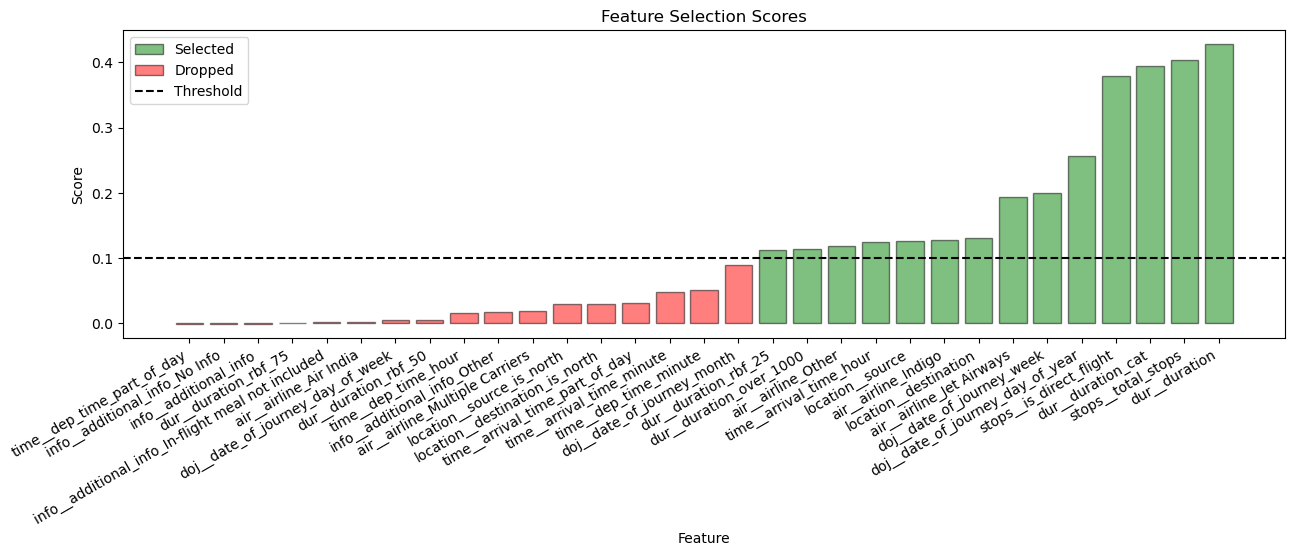

In [91]:
THRESHOLD = 0.1

selected_bar = None
dropped_bar = None
colors = ["red" if score < THRESHOLD else "green" for score in sorted_feat_imp.values()]

fig, ax = plt.subplots(figsize=(15, 4))

for i, (feature, score) in enumerate(sorted_feat_imp.items()):
    params = dict(
        x=i,
        height=score,
        edgecolor="black",
        alpha=0.5
    )
    
    if score < THRESHOLD:
        bar = ax.bar(
            color="red",
            **params
        )
        if not dropped_bar:
            dropped_bar = bar[0]
    else:
        bar = ax.bar(
            color="green",
            **params
        )
        if not selected_bar:
            selected_bar = bar[0]

thresh_line = ax.axhline(
    y=0.1,
    color="black",
    linestyle="--"
)

ax.set_xticks(
    ticks=range(len(sorted_feat_imp)),
    labels=list(sorted_feat_imp.keys()),
    rotation=30,
    ha="right"
)

ax.set(
    xlabel="Feature",
    ylabel="Score",
    title="Feature Selection Scores"
)

ax.legend(
    handles=[selected_bar, dropped_bar, thresh_line],
    labels=["Selected", "Dropped", "Threshold"],
    loc="upper left"
)

plt.show()